# Replace data in a pre-made NetCDF file

This notebook is about replace fake or interpolated rainfall (when ready) to a pre-made NetCDF forcing that was successfully run WRF hydro. The steps is as below:
1. Load the pre-made NetCDF forcing (or create a NetCDF as the same meta info) that was working for your model
2. Replace variables by random numbers
3. Replace by interpolated scatter points for the variable, transform projection

**NOTE**: This works but it doesn't have the flexibility to change similation domain if we're interested in other region, where doesn't have pre-made NetCDF file.

In [1]:
import xarray as xr
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [4]:
f = '../example_output/nwm.20190321/nwm.t00z.analysis_assim.forcing.tm00.hawaii.nc'
ds = xr.open_dataset(f)
variable = 'RAINRATE'

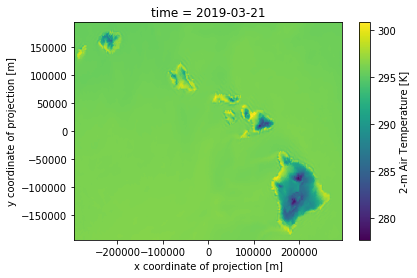

In [7]:
rainrate = ds.RAINRATE
rainrate.plot()

In [4]:
# get lat, lon, and var as numpy arrays
y = ds.coords['y'].values
x = ds.coords['x'].values
vals = ds[variable].values

### Generate random number for the variable (without interpolation)

In [5]:
import random
# insert random data
for i in range(0, len(y), 1):
    for j in range (0, len(x), 1):
        vals[0][i][j] = random.uniform(vals.min(), vals.max())


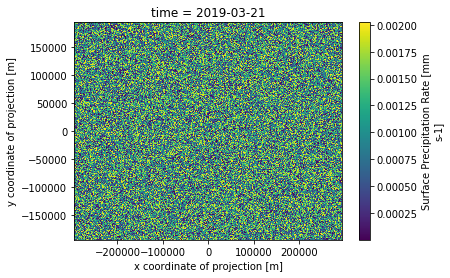

In [102]:
ds.RAINRATE.plot()

In [105]:
ds.to_netcdf('../example_data/Test_fake_rainfall/2019022606.LDASIN_DOMAIN1')

### Interpolate scatter points for the variable (random for now)

Transform projection

In [25]:
# !pip install GDAL
p = Proj("+proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=10.0 +lat_2=30.0 +lat_0=20.6 +lon_0=-157.42 +x_0=0 +y_0=0 +k_0=1.0 +nadgrids=@null +wktext  +no_defs ")
p(-158.28706, 21.241737)

(-88499.67433596989, 70499.96071254686)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x_scatter = [random.randint(int(x.min()), int(x.max())) for r in range(50)]
y_scatter = [random.randint(int(y.min()), int(y.max())) for r in range(50)]
rain_scatter = abs(np.random.sample(50))

# target grid to interpolate to
xi = x
yi = y
xi,yi = np.meshgrid(xi,yi)

# # set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
rain_new = griddata((x_scatter,y_scatter),rain_scatter,(xi,yi),method='linear')  # note: cubic might cause negative values

# # mask out the field
# zi[mask] = np.nan


In [39]:
# reshape new rain rate into 3-D
ds.RAINRATE.values = rain_new.reshape(1,390,590)

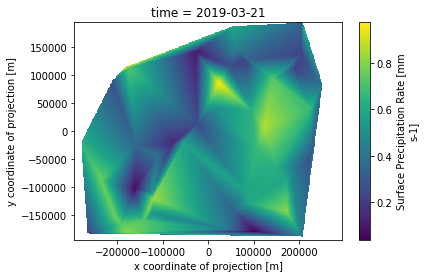

In [40]:
ds.RAINRATE.plot()